<a href="https://www.kaggle.com/code/invadron/fetal-health-classification?scriptVersionId=141800109" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Our target variable is fetal_health and we have checked our model performance using Recall value. In this programing we were able to achieve 98% recall value for Normal, 97% for susceptible and 99% for pathological. In this I have tried my best of not taking assumption on data features and fitted the best model avoiding overfitting. Please feel free to comment on this code on how we can improve it more. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [2]:
df=pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
dups=df.duplicated()
dups.sum()

13

In [6]:
### duplicated are les than 3% of data hence deleting duplicated rows
df.drop_duplicates(inplace=True)

In [7]:
df['fetal_health'].unique()

array([2., 1., 3.])

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


#### fetal_health is the target column for classification. Assuming the order of health status as stated in data description ie 1. Normal 2. Suspect 3. Pathological


In [9]:
df.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

#### on researching I found that these features of CTG's report are continous. only the fetal health feature is categorical.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


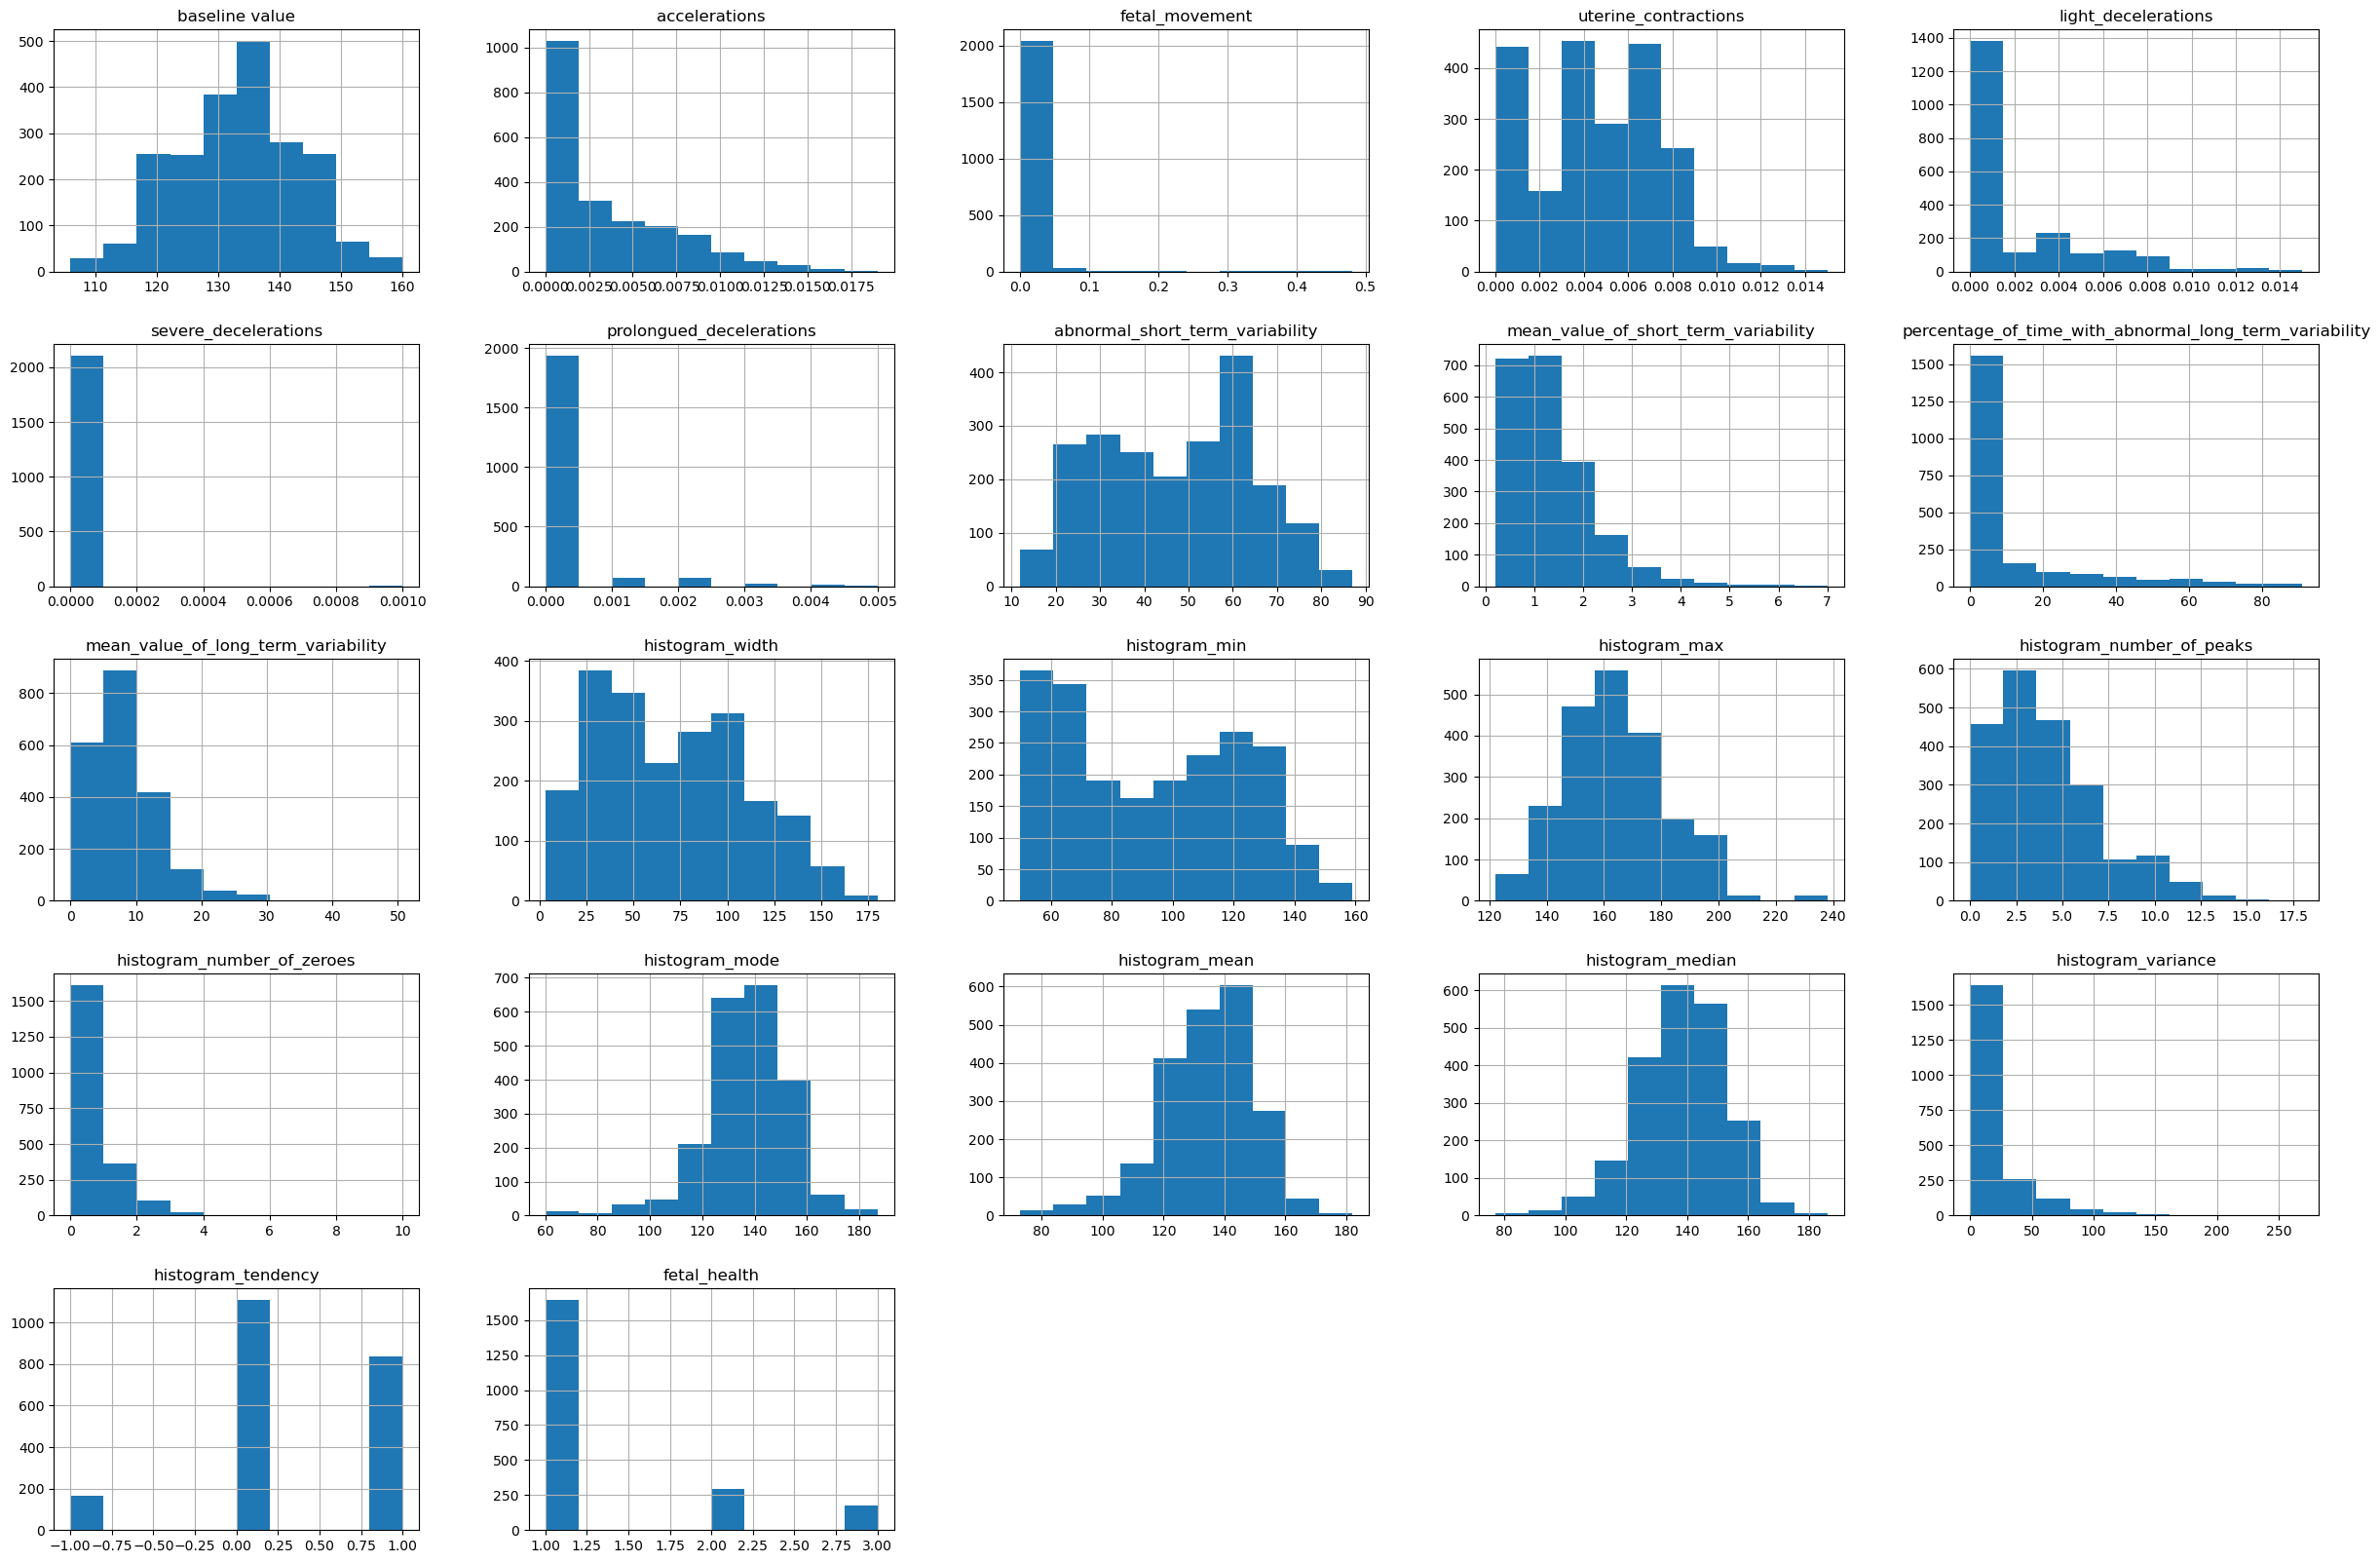

In [11]:
df.hist(figsize=(30,20));

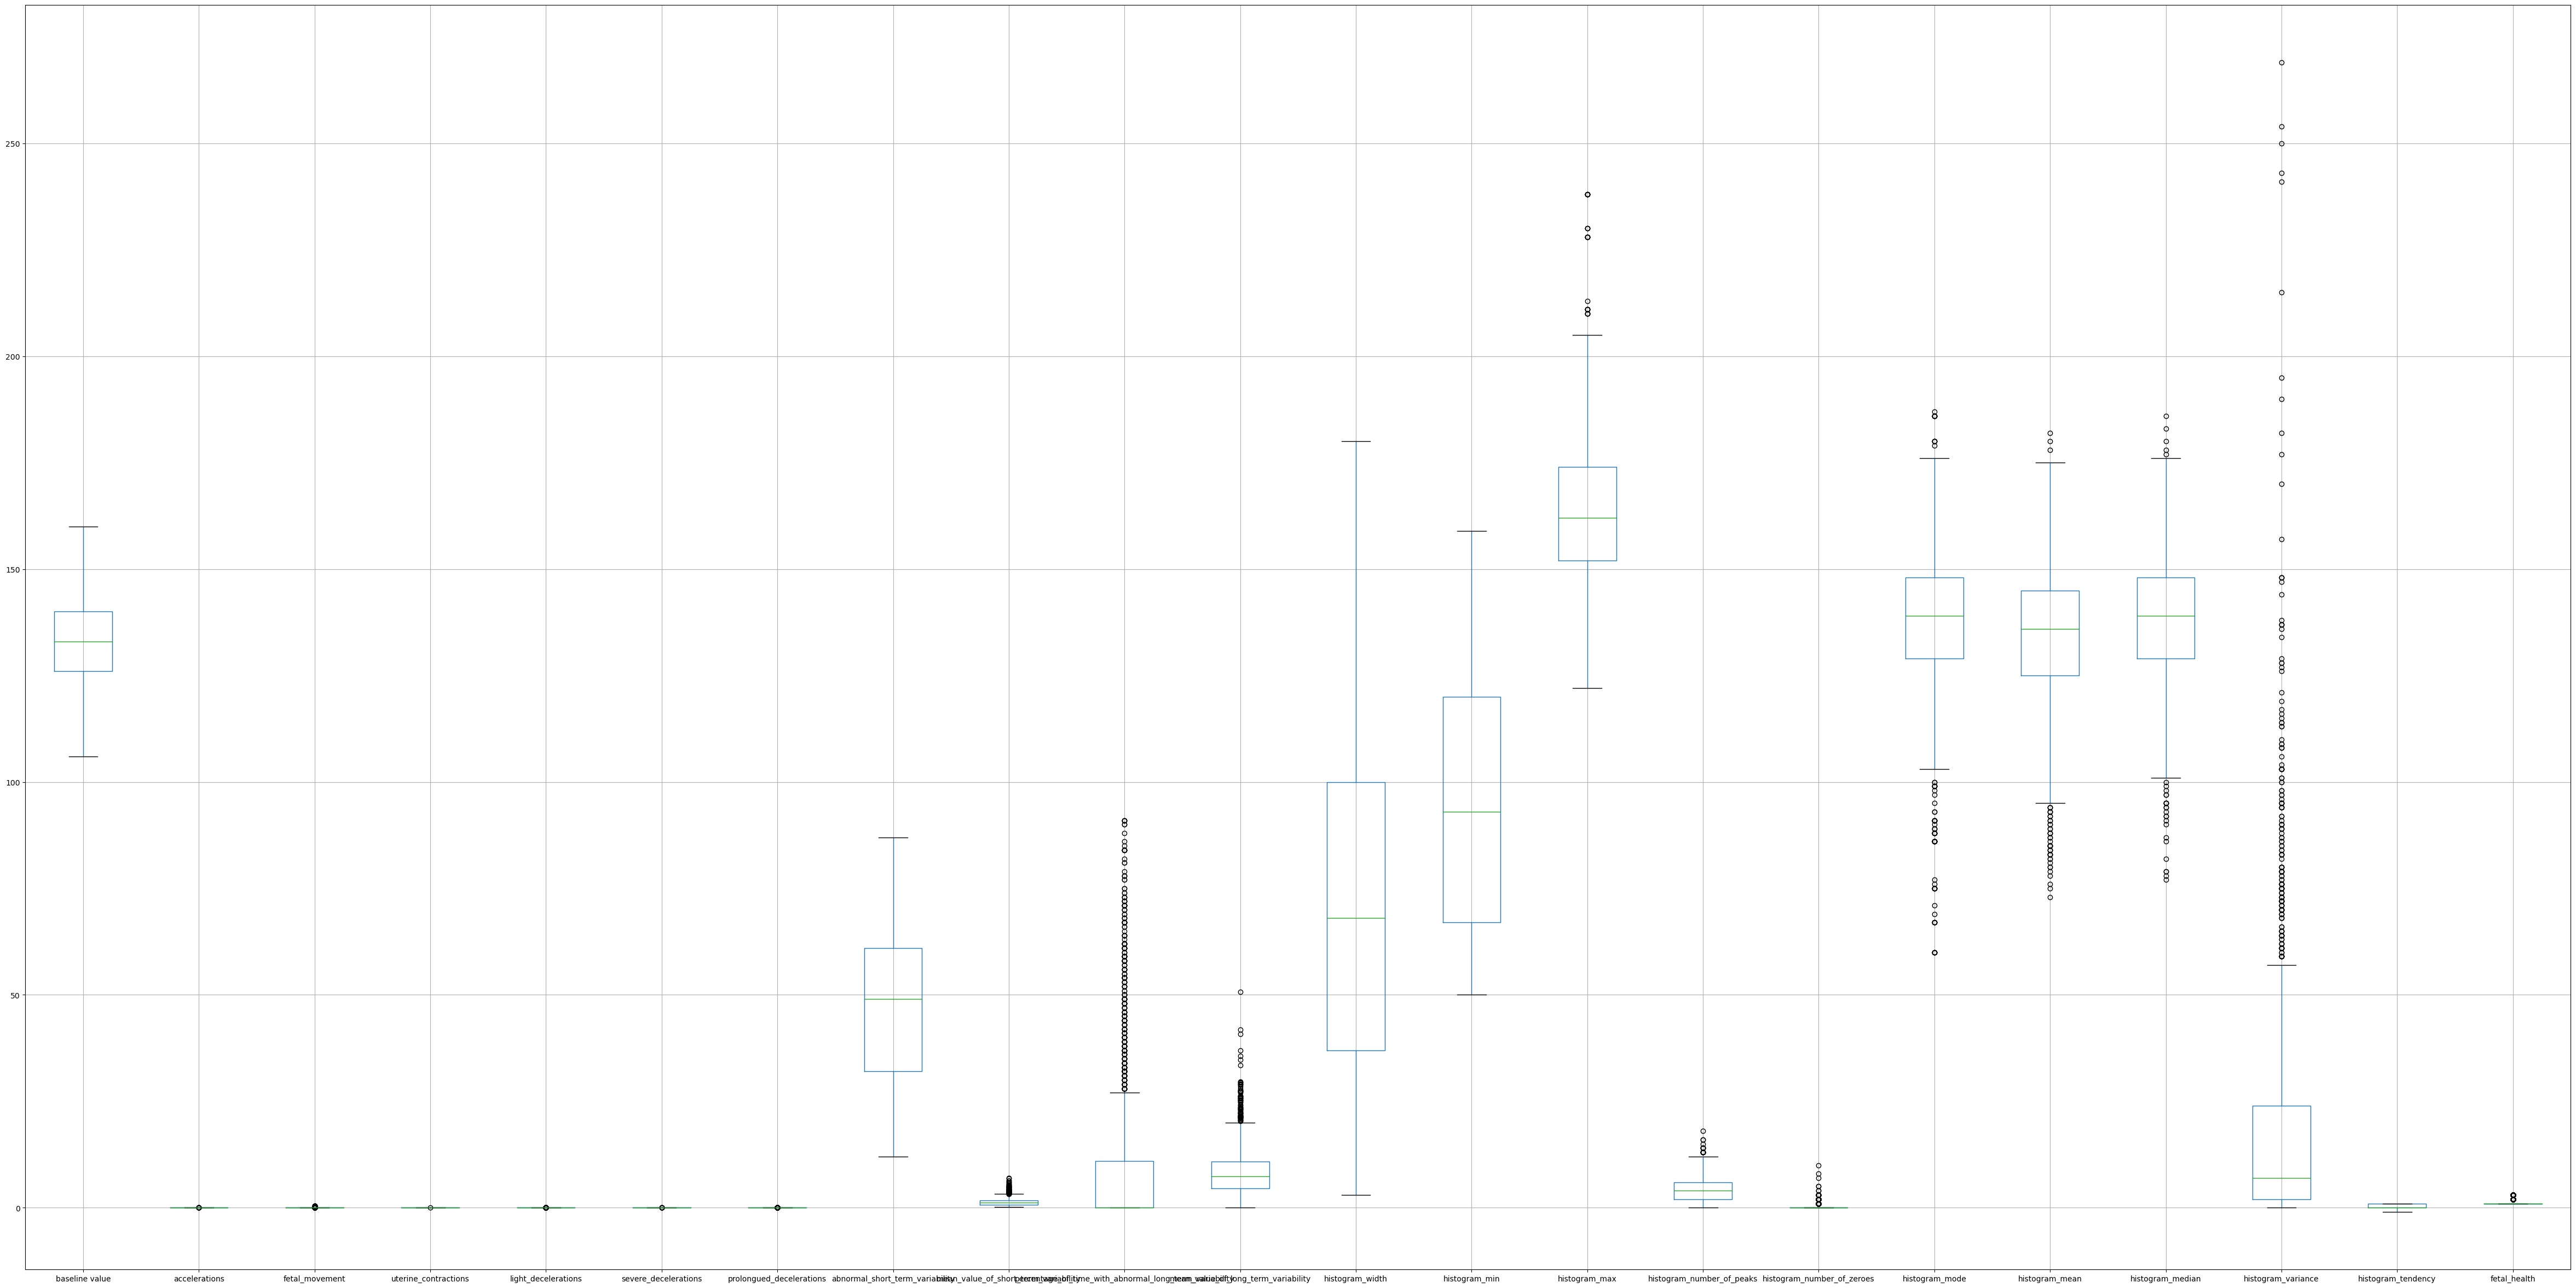

In [12]:
df.boxplot(figsize=(60,30));

#### There are various outliers. Rather than treating these outliers we will use machine learning models which are robust to outliers. We don't have any specific knowledge to deal with outliers in this particular health domain problem as our general treatment of outliers may lead to biases.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
x = df.drop("fetal_health" , axis=1)
y = df.pop("fetal_health")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [15]:
dtree= DecisionTreeClassifier(criterion='gini',random_state=1)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [16]:
print(dtree.score(x_train, y_train))
print(dtree.score(x_test, y_test))

0.9986477349560514
0.9085173501577287


In [17]:
y_predict = dtree.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[463  20   2]
 [ 26  72   1]
 [  5   4  41]]


In [19]:
class_rep = classification_report(y_test, y_predict)
print("Classification Report:Test Data")
print(class_rep)

Classification Report:Test Data
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       485
         2.0       0.75      0.73      0.74        99
         3.0       0.93      0.82      0.87        50

    accuracy                           0.91       634
   macro avg       0.87      0.83      0.85       634
weighted avg       0.91      0.91      0.91       634



In [20]:
#### checking overfitting
y_predict1 = dtree.predict(x_train)
class_rep = classification_report(y_train, y_predict1)
print("Classification Report:Training Data")
print(class_rep)

Classification Report:Training Data
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1161
         2.0       1.00      0.99      0.99       193
         3.0       1.00      1.00      1.00       125

    accuracy                           1.00      1479
   macro avg       1.00      1.00      1.00      1479
weighted avg       1.00      1.00      1.00      1479



### By comparing f1 score of training and test we can see the decision tree is overfitting. Random forrest although mitigate overfitting in the sense that so many individual decision trees. So we will check for overfitting their and try to do some sort of pruning for better decision tree models.

In [21]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier

bgcl = BaggingClassifier(base_estimator=dtree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [22]:
print(bgcl.score(x_train , y_train))
print(bgcl.score(x_test , y_test))

0.9979716024340771
0.9274447949526814


In [23]:
y_predict = bgcl.predict(x_test)
bgcl_rep = classification_report(y_test, y_predict)
print("Classification Report: Test Data")
print(bgcl_rep)

Classification Report: Test Data
              precision    recall  f1-score   support

         1.0       0.93      0.98      0.96       485
         2.0       0.88      0.72      0.79        99
         3.0       0.95      0.82      0.88        50

    accuracy                           0.93       634
   macro avg       0.92      0.84      0.88       634
weighted avg       0.93      0.93      0.92       634



In [24]:
### checking overfitting
y_predict1 = bgcl.predict(x_train)
class_rep = classification_report(y_train, y_predict1)
print("Classification Report: Training Data")
print(class_rep)

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1161
         2.0       1.00      0.98      0.99       193
         3.0       1.00      1.00      1.00       125

    accuracy                           1.00      1479
   macro avg       1.00      0.99      1.00      1479
weighted avg       1.00      1.00      1.00      1479



In [25]:
### Pruning for overfitting
base_tree = DecisionTreeClassifier(max_depth=3)
bgcl = BaggingClassifier(base_estimator=base_tree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

y_predict = bgcl.predict(x_test)
bgcl_rep = classification_report(y_test, y_predict)
print("Classification Report:Testing data")
print(bgcl_rep)

y_predict1 = bgcl.predict(x_train)
class_rep = classification_report(y_train, y_predict1)
print("Classification Report: Training data")
print(class_rep)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:Testing data
              precision    recall  f1-score   support

         1.0       0.90      0.98      0.94       485
         2.0       0.82      0.60      0.69        99
         3.0       1.00      0.76      0.86        50

    accuracy                           0.90       634
   macro avg       0.91      0.78      0.83       634
weighted avg       0.90      0.90      0.89       634

Classification Report: Training data
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95      1161
         2.0       0.79      0.59      0.67       193
         3.0       0.97      0.90      0.93       125

    accuracy                           0.92      1479
   macro avg       0.89      0.82      0.85      1479
weighted avg       0.91      0.92      0.91      1479



#### Now we have done pruning and now we can perform further modelling with this pruning in order to avoid overfitting

#### Here our main target is Recall as we want to see how well our model able to predict the true positives better. Above we have used decision tree and Bagging technique of Random Forest. And for 2nd and 3rd category ie. Susceptible and Pathological have very low recall values in comparison to normal. This is occuring because proportion of data fo susceptible and pathological is very less than normal. Hence we have to do oversampling in order to maintain the proportion of data for all the three.

##### We will check the recall for both oversampling and undersampling

In [26]:
df1=pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')

In [27]:
x1 = df1.drop("fetal_health" , axis=1)
y1 = df1.pop("fetal_health")


In [28]:
from collections import Counter

counter=Counter(y1)
counter

Counter({1.0: 1655, 2.0: 295, 3.0: 176})

In [29]:
### using smote technique for oversampling


from imblearn.over_sampling import SMOTE

oversample= SMOTE()
x1,y1=oversample.fit_resample(x1,y1)

In [30]:

counter=Counter(y1)
counter

Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})

In [31]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.30,random_state=1)

In [32]:
## Fitting decision tree on synthisized data
dtree= DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)
dtree.fit(x1_train,y1_train)
y1_predict = dtree.predict(x1_test)
conf_matrix = confusion_matrix(y1_test, y1_predict)
print("Confusion Matrix:")
print(conf_matrix)
class_rep = classification_report(y1_test, y1_predict)
print("Classification Report: Test Data")
print(class_rep)
y2_predict = dtree.predict(x1_train)
class_rep2 = classification_report(y1_train, y2_predict)
print("Classification Report: Training Data")
print(class_rep2)

Confusion Matrix:
[[483  30   5]
 [122 348   4]
 [ 36  66 396]]
Classification Report: Test Data
              precision    recall  f1-score   support

         1.0       0.75      0.93      0.83       518
         2.0       0.78      0.73      0.76       474
         3.0       0.98      0.80      0.88       498

    accuracy                           0.82      1490
   macro avg       0.84      0.82      0.82      1490
weighted avg       0.84      0.82      0.82      1490

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       0.73      0.93      0.82      1137
         2.0       0.80      0.72      0.76      1181
         3.0       0.99      0.82      0.90      1157

    accuracy                           0.82      3475
   macro avg       0.84      0.83      0.83      3475
weighted avg       0.84      0.82      0.83      3475



In [33]:
bgcl1 = BaggingClassifier(base_estimator=dtree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl1 = bgcl1.fit(x1_train, y1_train)
y1_predict = bgcl1.predict(x1_test)
bgcl_rep1 = classification_report(y1_test, y1_predict)
print("Classification Report:")
print(bgcl_rep1)
y2_predict = bgcl1.predict(x1_train)
class_rep2 = classification_report(y1_train, y2_predict)
print("Classification Report: Training Data")
print(class_rep2)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         1.0       0.84      0.84      0.84       518
         2.0       0.75      0.89      0.81       474
         3.0       0.98      0.80      0.88       498

    accuracy                           0.84      1490
   macro avg       0.85      0.84      0.84      1490
weighted avg       0.86      0.84      0.84      1490

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       0.84      0.84      0.84      1137
         2.0       0.77      0.89      0.82      1181
         3.0       0.99      0.82      0.90      1157

    accuracy                           0.85      3475
   macro avg       0.86      0.85      0.85      3475
weighted avg       0.86      0.85      0.85      3475



### We have put bagging model with pruned decision tree to avoid overfitting. Now we will proceed with boosting and xgboost and check its overfitting and trey to get the best recall value

In [34]:
### checking boosting models. First doing it without pruining
base_tree = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator=base_tree,random_state=1)
abc.fit(x1_train,y1_train)
y1_predict = abc.predict(x1_test)
abc_rep = classification_report(y1_test, y1_predict)
print("Classification Report:")
print(abc_rep)

y2_predict = abc.predict(x1_train)
class_rep2 = classification_report(y1_train, y2_predict)
print("Classification Report: Training Data")
print(class_rep2)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       518
         2.0       0.95      0.95      0.95       474
         3.0       0.98      0.98      0.98       498

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1137
         2.0       1.00      1.00      1.00      1181
         3.0       1.00      1.00      1.00      1157

    accuracy                           1.00      3475
   macro avg       1.00      1.00      1.00      3475
weighted avg       1.00      1.00      1.00      3475



#### Overfitting is coming in boosting also hence using pruned decision tree

In [35]:
base_tree = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator=base_tree,random_state=1)
abc.fit(x1_train,y1_train)
y1_predict = abc.predict(x1_test)
abc_rep = classification_report(y1_test, y1_predict)
print("Classification Report:")
print(abc_rep)

y2_predict = abc.predict(x1_train)
class_rep2 = classification_report(y1_train, y2_predict)
print("Classification Report: Training Data")
print(class_rep2)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.95      0.96       518
         2.0       0.95      0.95      0.95       474
         3.0       0.98      0.98      0.98       498

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1137
         2.0       1.00      1.00      1.00      1181
         3.0       1.00      1.00      1.00      1157

    accuracy                           1.00      3475
   macro avg       1.00      1.00      1.00      3475
weighted avg       1.00      1.00      1.00      3475



In [36]:
### Gradient Boosting also checking if overfitting

gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x1_train,y1_train)
y1_predict = gbc.predict(x1_test)
gr_rep = classification_report(y1_test, y1_predict)
print("Classification Report:")
print(gr_rep)

y2_predict = gbc.predict(x1_train)
class_rep2 = classification_report(y1_train, y2_predict)
print("Classification Report: Training Data")
print(class_rep2)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.98       518
         2.0       0.96      0.97      0.96       474
         3.0       0.98      0.98      0.98       498

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.99      1137
         2.0       0.98      0.99      0.99      1181
         3.0       1.00      1.00      1.00      1157

    accuracy                           0.99      3475
   macro avg       0.99      0.99      0.99      3475
weighted avg       0.99      0.99      0.99      3475



In [37]:
### Using max depth to see change in overfitting

gbc = GradientBoostingClassifier(max_depth=2,random_state=1)
gbc.fit(x1_train,y1_train)
y1_predict = gbc.predict(x1_test)
gr_rep = classification_report(y1_test, y1_predict)
print("Classification Report:")
print(gr_rep)

y2_predict = gbc.predict(x1_train)
class_rep2 = classification_report(y1_train, y2_predict)
print("Classification Report: Training Data")
print(class_rep2)

Classification Report:
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       518
         2.0       0.93      0.97      0.95       474
         3.0       0.99      0.97      0.98       498

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96      1137
         2.0       0.94      0.97      0.96      1181
         3.0       0.99      0.98      0.99      1157

    accuracy                           0.97      3475
   macro avg       0.97      0.97      0.97      3475
weighted avg       0.97      0.97      0.97      3475



In [38]:
### Using XG Boost
from xgboost import XGBClassifier
y_train_mapped = y1_train - 1
y_test_mapped = y1_test - 1

xgb = XGBClassifier(random_state=1)
xgb.fit(x1_train,y_train_mapped)
y1_predict = xgb.predict(x1_test)
y_pred = y1_predict + 1
xgb_rep = classification_report(y1_test, y_pred)
print("Classification Report: Test Data")
print(xgb_rep)

y4_predict = xgb.predict(x1_train)
y_pred4 = y4_predict + 1
xgb_rep1 = classification_report(y1_train, y_pred4)
print("Classification Report: Training Data")
print(xgb_rep1)

Classification Report: Test Data
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99       518
         2.0       0.99      0.97      0.98       474
         3.0       0.99      0.99      0.99       498

    accuracy                           0.99      1490
   macro avg       0.99      0.99      0.99      1490
weighted avg       0.99      0.99      0.99      1490

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1137
         2.0       1.00      1.00      1.00      1181
         3.0       1.00      1.00      1.00      1157

    accuracy                           1.00      3475
   macro avg       1.00      1.00      1.00      3475
weighted avg       1.00      1.00      1.00      3475



In [39]:
### Overfitting in XGboost. including max_depth in order to avoid overfitting
params = {
   
    'n_estimators': 100,  # Number of boosting stages (trees)
    'max_depth': 2,       # Maximum depth of individual trees
    'random_state':1
}

y_train_mapped = y1_train - 1
y_test_mapped = y1_test - 1

xgb = XGBClassifier(**params)
xgb.fit(x1_train,y_train_mapped)
y1_predict = xgb.predict(x1_test)
y_pred = y1_predict + 1
xgb_rep = classification_report(y1_test, y_pred)
print("Classification Report: Test Data")
print(xgb_rep)

y4_predict = xgb.predict(x1_train)
y_pred4 = y4_predict + 1
xgb_rep1 = classification_report(y1_train, y_pred4)
print("Classification Report: Training Data")
print(xgb_rep1)

Classification Report: Test Data
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       518
         2.0       0.96      0.96      0.96       474
         3.0       0.99      0.98      0.98       498

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490

Classification Report: Training Data
              precision    recall  f1-score   support

         1.0       0.99      0.98      0.98      1137
         2.0       0.98      0.99      0.98      1181
         3.0       1.00      1.00      1.00      1157

    accuracy                           0.99      3475
   macro avg       0.99      0.99      0.99      3475
weighted avg       0.99      0.99      0.99      3475



## Hence XG Boost giving the best result of 98% recall for normal, 97% recall for Susceptible and 99% recall for pathological. Its greater than the oversampling data. Hence the above can easily be used in predicting the fetal health with an appreciable recall value without the use of synthesized data.